In [2]:
import tensorflow as tf

In [3]:
tf.__version__
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

**Importing libraries** 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing Fashion Mnist dataset from keras.datasets


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


0

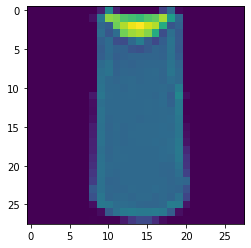

In [7]:
plt.imshow(X_train_full[2])
y_train_full[2]

In [8]:
class_names =["T-shirt/Top","Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

**Data Normalisation**

We normalise the data to perform Gradient Descent on data

In [9]:
X_train_n = X_train_full/255
X_test_n = X_test /255

Splitting the data into training and validation(for hyperparameter tuning)


In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

random seed : Giving random values will generate the same random number and will generate the same output fr the program when run twice.

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

**Model Creation**

and viewing the summary of the created model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


viewing the weights and biases


In [13]:
weights, biases = model.layers[1].get_weights()
weights
weights.shape
biases
biases.shape

(300,)

compiling the  model

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [18]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [20]:
model_history.params
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8457818031311035,
  0.8565636277198792,
  0.8622363805770874,
  0.8675454258918762,
  0.8715817928314209,
  0.8747454285621643,
  0.8793454766273499,
  0.8820545673370361,
  0.8839091062545776,
  0.8865454792976379,
  0.8896363377571106,
  0.8916545510292053,
  0.8939999938011169,
  0.8971454501152039,
  0.8979091048240662,
  0.9006181955337524,
  0.902363657951355,
  0.9035817980766296,
  0.9055818319320679,
  0.9071454405784607,
  0.9085999727249146,
  0.9103817939758301,
  0.9126545190811157,
  0.9137818217277527,
  0.9155091047286987,
  0.9166181683540344,
  0.9180545210838318,
  0.9203454256057739],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390644133090973,
  0.41230905055999756,
  0.39393678307533264,
  0.37517988681793213,
  0.3631107211112976,
  0.3514234721660614,
  0.34116992354393005,
  0.3316737115383148,
  0.32377755641937256,
  0.31472039222717285,
  0.3077256381511688,
  0.30191129446029663,
  0.294

To visualize how our loss and accuracy is changing



<function matplotlib.pyplot.show>

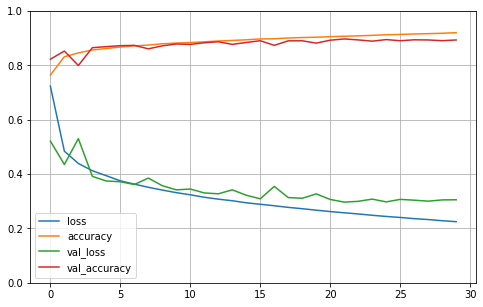

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

**Evaluate Model Performance**



In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]

The above code will display the accuracy and loss function...


In [24]:
X_new = X_test[:3]
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

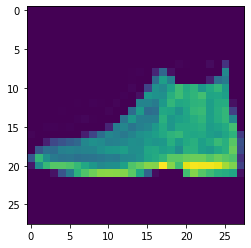

In [29]:
plt.imshow(X_new[0])

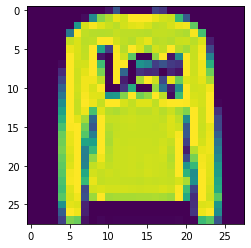

In [30]:
plt.imshow(X_new[1])

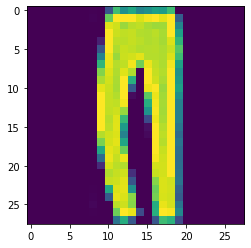

In [31]:
plt.imshow(X_new[2])